# Homework - Neural networks - Part B (55 points)
## Gradient descent for simple two and three layer models

by *Brenden Lake* and *Todd Gureckis*  
Computational Cognitive Modeling  
NYU class webpage: https://brendenlake.github.io/CCM-site/  

<div class="alert alert-danger" role="alert">
This homework is due before midnight on Monday, Feb. 13, 2023.
</div>

The first part of this assignment implements the gradient descent algorithm for a simple artificial neuron. The second part implements backpropagation for a simple network with one hidden unit.

In the first part, the neuron will learn to compute logical OR. The neuron model and logical OR are shown below, for inputs $x_0$ and $x_1$ and target output $y$.

<img src="images/nn_OR.jpeg" style="width: 350px;"/>

This assignment requires some basic PyTorch knowledge. You can review your notes from lab and this [PyTorch tutorial](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html). The "Introduction to PyTorch" section on the PyTorch website is also helpful.

In [1]:
# Import libraries
from __future__ import print_function
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch

Let's create `torch.tensor` objects for representing the data matrix `X` with targets `Y_or` (for the logical OR function). Each row of `X` is a different input pattern.

In [2]:
X_list = [[0.,0.], [0.,1.], [1.,0.], [1.,1.]]
X = torch.tensor(X_list)
Y_or = torch.tensor([0.,1.,1.,1.])
N = X.shape[0] # number of input patterns
print("Input tensor X:")
print('  has shape',X.shape)
print('  and contains',X)
print('Target tensor Y:')
print('  has shape',Y_or.shape)
print('  and contains',Y_or)

Input tensor X:
  has shape torch.Size([4, 2])
  and contains tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
Target tensor Y:
  has shape torch.Size([4])
  and contains tensor([0., 1., 1., 1.])


The artificial neuron operates as follows. Given an input vector $x$ (which is one row of input tensor $X$), the net input ($\textbf{net}$) to the neuron is computed as follows

$$ \textbf{net} = \sum_i x_i w_i + b,$$

for weights $w_i$ and bias $b$. The activation function $g(\textbf{net})$ is the logistic function

$$ g(\textbf{net}) = \frac{1}{1+e^{-\textbf{net}}},$$

which is used to compute the predicted output $\hat{y} = g(\textbf{net})$. Finally, the loss (squared error) for a particular pattern $x$ is defined as 

$$ E(w,b) = (\hat{y}-y)^2,$$

where the target output is $y$. **Your main task is to manually compute the gradients of the loss $E$ with respect to the neuron parameters:**

$$\frac{\partial E(w,b)}{\partial w}, \frac{\partial E(w,b)}{\partial b}.$$

By manually, we mean to program the gradient computation directly, using the formulas discussed in class. This is in contrast to using PyTorch's `autograd` (Automatric differentiation) that computes the gradient automatically, as discussed in class, lab, and in the PyTorch tutorial (e.g., `loss.backward()`). First, let's write the activation function and the loss in PyTorch. 

In [3]:
def g_logistic(net):
    return 1. / (1.+torch.exp(-net))

def loss(yhat,y):
    return (yhat-y)**2

Next, we'll also write two functions for examining the internal operations of the neuron, and the gradients of its parameters.

In [4]:
def print_forward(x,yhat,y):
    # Examine network's prediction for input x
    print(' Input: ',end='')
    print(x.numpy())
    print(' Output: ' + str(round(yhat.item(),3)))
    print(' Target: ' + str(y.item()))

def print_grad(grad_w,grad_b):
    # Examine gradients
    print('  d_loss / d_w = ',end='')
    print(grad_w)
    print('  d_loss / d_b = ',end='')
    print(grad_b)

Now let's dive in and begin the implementation of stochastic gradient descent. We'll initialize our parameters $w$ and $b$ randomly, and proceed through a series of epochs of training. Each epoch involves visiting the four training patterns in random order, and updating the parameters after each presentation of an input pattern.



<div class="alert alert-success" role="alert">
<h3> Problem 1 (10 points) </h3>
<br>
In the code below, fill in code to manually compute the gradient in closed form.
    <ul>
        <li>See lecture slides for the equation for the gradient for the weights w.</li>
        <li>Derive (or reason) to get the equation for the gradient for bias b.</li>
    </ul>
</div>

<div class="alert alert-success" role="alert">
<h3> Problem 2 (5 points) </h3>
<br>
In the code below, fill in code for the weight and bias update rule for gradient descent.
</div>

After completing the code, run it to compare **your gradients** with the **ground-truth computed by PyTorch.** (There may be small differences that you shouldn't worry about, e.g. within 1e-6). Also, you can check the neuron's performance at the end of training.

Compute the gradient manually
 Input: [0. 0.]
 Output: 0.555
 Target: 0.0
  d_loss / d_w = [0. 0.]
  d_loss / d_b = [0.27417153]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [0. 0.]
  d_loss / d_b = [0.27417153]

Compute the gradient manually
 Input: [0. 1.]
 Output: 0.817
 Target: 1.0
  d_loss / d_w = [-0.         -0.05479101]
  d_loss / d_b = [-0.05479101]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [ 0.       -0.054791]
  d_loss / d_b = [-0.054791]

Compute the gradient manually
 Input: [1. 0.]
 Output: 0.742
 Target: 1.0
  d_loss / d_w = [-0.09865378 -0.        ]
  d_loss / d_b = [-0.09865378]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [-0.09865379  0.        ]
  d_loss / d_b = [-0.09865379]

Compute the gradient manually
 Input: [1. 1.]
 Output: 0.914
 Target: 1.0
  d_loss / d_w = [-0.01365403 -0.01365403]
  d_loss / d_b = [-0.01365403]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [-0.01365403 -0.013654

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 150; error=0.26
epoch 200; error=0.228
epoch 250; error=0.202
epoch 300; error=0.181
epoch 350; error=0.163
epoch 400; error=0.148
epoch 450; error=0.135
epoch 500; error=0.124
epoch 550; error=0.114
epoch 600; error=0.106
epoch 650; error=0.098
epoch 700; error=0.092
epoch 750; error=0.086
epoch 800; error=0.081
epoch 850; error=0.076
epoch 900; error=0.072
epoch 950; error=0.068
epoch 1000; error=0.065
epoch 1050; error=0.062
epoch 1100; error=0.059
epoch 1150; error=0.056
epoch 1200; error=0.054
epoch 1250; error=0.051
epoch 1300; error=0.049
epoch 1350; error=0.047
epoch 1400; error=0.046
epoch 1450; error=0.044
epoch 1500; error=0.042
epoch 1550; error=0.041
epoch 1600; error=0.04
epoch 1650; error=0.038
epoch 1700; error=0.037
epoch 1750; error=0.036
epoch 1800; error=0.035
epoch 1850; error=0.034
epoch 1900; error=0.033
epoch 1950; error=0.032
epoch 2000; error=0.031
epoch 2050; error=0.03
epoch 2100; error=0.029
epoch 2150; error=0.029
epoch 2200; error=0.028
epoch 2250; 

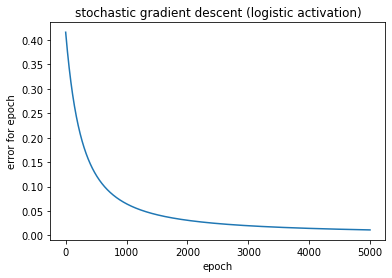

In [5]:
# Initialize parameters
#     Although you will implement gradient descent manually, let's set requires_grad=True
#     anyway so PyTorch will track the gradient too, and we can compare your gradient with PyTorch's.
w = torch.randn(2, requires_grad=True) # [size 2] tensor
b = torch.randn(1, requires_grad=True) # [size 1] tensor

alpha = 0.05 # learning rate
nepochs = 5000 # number of epochs

track_error = []
verbose = True
for e in range(nepochs): # for each epoch
    error_epoch = 0. # sum loss across the epoch
    perm = np.random.permutation(N)
    for p in perm: # visit data points in random order
        x_pat = X[p,:] # get one input pattern
        
        # compute output of neuron
        net = torch.dot(x_pat,w)+b
        yhat = g_logistic(net)
        
        # compute loss
        y = Y_or[p]
        myloss = loss(yhat,y)
        error_epoch += myloss.item()
        
        # Compute the gradient manually
        if verbose:
            print('Compute the gradient manually')
            print_forward(x_pat,yhat,y)
        with torch.no_grad():
            # TODO : YOUR GRADIENT CODE GOES HERE
            #  two lines of the form
            w_grad = torch.tensor(2*(yhat-y)*yhat*(1-yhat)*x_pat)
            b_grad = torch.tensor(2*(yhat-y)*yhat*(1-yhat))
            #  make sure to inclose your code in the "with torch.no_grad()" wrapper,
            #   otherwise PyTorch will try to track the "gradient" of the gradient computation, which we don't want.         
            #raise Exception('Replace with your code.')                      
        if verbose: print_grad(w_grad.numpy(),b_grad.numpy())

        # Compute the gradient with PyTorch and compre with manual values
        if verbose: print('Compute the gradient using PyTorch .backward()')
        myloss.backward()
        if verbose:
            print_grad(w.grad.numpy(),b.grad.numpy())
            print("")
        w.grad.zero_() # clear PyTorch's gradient
        b.grad.zero_()
        
        # Parameter update with gradient descent
        with torch.no_grad():
            # TODO : YOUR PARAMETER UPDATE CODE GOES HERE
            #  two lines of the form:
            w -= alpha*w_grad
            b -= alpha*b_grad
            #raise Exception('Replace with your code.')
            
    if verbose==True: verbose=False
    track_error.append(error_epoch)
    if e % 50 == 0:
        print("epoch " + str(e) + "; error=" +str(round(error_epoch,3)))

# print a final pass through patterns
for p in range(X.shape[0]):
    x_pat = X[p]
    net = torch.dot(x_pat,w)+b
    yhat = g_logistic(net)
    y = Y_or[p]
    print("Final result:")
    print_forward(x_pat,yhat,y)
    print("")
    
# track output of gradient descent
plt.figure()
plt.clf()
plt.plot(track_error)
plt.title('stochastic gradient descent (logistic activation)')
plt.ylabel('error for epoch')
plt.xlabel('epoch')
plt.show()

Now let's change the activation function to "linear" (identity function) from the "logistic" function, such that $g(\textbf{net}) = \textbf{net}$. With a linear rather than logistic activation, the output will no longer be constrained between 0 and 1. The artificial neuron will still try to solve the problem with 0/1 targets. Here is the simple implementation of $g(\cdot)$:

In [6]:
def g_linear(x):
    return x

<div class="alert alert-success" role="alert">
<h3> Problem 3 (5 points) </h3>
<br>
Just as before, fill in the missing code fragments for implementing gradient descent. This time we are using the linear activation function. Be sure to change your gradient calculation to reflect the new activation function.
</div>

Compute the gradient manually
 Input: [0. 1.]
 Output: -0.025
 Target: 1.0
  d_loss / d_w = [-0.        -2.0493014]
  d_loss / d_b = [-2.0493014]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [-0.        -2.0493014]
  d_loss / d_b = [-2.0493014]

Compute the gradient manually
 Input: [1. 1.]
 Output: -0.074
 Target: 1.0
  d_loss / d_w = [-2.1486144 -2.1486144]
  d_loss / d_b = [-2.1486144]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [-2.1486144 -2.1486144]
  d_loss / d_b = [-2.1486144]

Compute the gradient manually
 Input: [1. 0.]
 Output: 0.09
 Target: 1.0
  d_loss / d_w = [-1.8208622 -0.       ]
  d_loss / d_b = [-1.8208622]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [-1.8208622  0.       ]
  d_loss / d_b = [-1.8208622]

Compute the gradient manually
 Input: [0. 0.]
 Output: 0.328
 Target: 0.0
  d_loss / d_w = [0. 0.]
  d_loss / d_b = [0.65553594]
Compute the gradient using PyTorch .backward()
  d_loss / d_w = [0. 0.]
  d_lo

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch 250; error=0.308
epoch 300; error=0.303
epoch 350; error=0.305
epoch 400; error=0.306
epoch 450; error=0.307
epoch 500; error=0.303
epoch 550; error=0.308
epoch 600; error=0.304
epoch 650; error=0.301
epoch 700; error=0.308
epoch 750; error=0.308
epoch 800; error=0.303
epoch 850; error=0.309
epoch 900; error=0.309
epoch 950; error=0.305
epoch 1000; error=0.298
epoch 1050; error=0.306
epoch 1100; error=0.307
epoch 1150; error=0.309
epoch 1200; error=0.307
epoch 1250; error=0.297
epoch 1300; error=0.301
epoch 1350; error=0.297
epoch 1400; error=0.304
epoch 1450; error=0.297
epoch 1500; error=0.305
epoch 1550; error=0.304
epoch 1600; error=0.306
epoch 1650; error=0.309
epoch 1700; error=0.3
epoch 1750; error=0.3
epoch 1800; error=0.306
epoch 1850; error=0.303
epoch 1900; error=0.302
epoch 1950; error=0.308
epoch 2000; error=0.311
epoch 2050; error=0.307
epoch 2100; error=0.31
epoch 2150; error=0.305
epoch 2200; error=0.305
epoch 2250; error=0.3
epoch 2300; error=0.308
epoch 2350; er

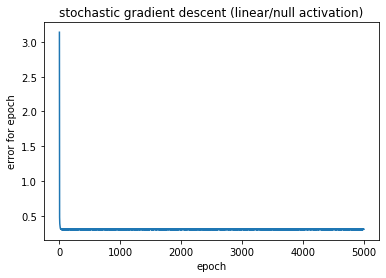

In [9]:
# Initialize parameters
#     Although you will implement gradient descent manually, let's set requires_grad=True
#     anyway so PyTorch will track the gradient too, and we can compare your gradient with PyTorch's.
w = torch.randn(2, requires_grad=True) # [size 2] tensor
b = torch.randn(1, requires_grad=True) # [size 1] tensor

alpha = 0.05 # learning rate
nepochs = 5000 # number of epochs

track_error = []
verbose = True
for e in range(nepochs): # for each epoch
    error_epoch = 0. # sum loss across the epoch
    perm = np.random.permutation(N)
    for p in perm: # visit data points in random order
        x_pat = X[p,:] # get one input pattern
        
        # compute output of neuron
        net = torch.dot(x_pat,w)+b
        yhat = g_linear(net)
        
        # compute loss
        y = Y_or[p]
        myloss = loss(yhat,y)
        error_epoch += myloss.item()
        
        # Compute the gradient manually
        if verbose:
            print('Compute the gradient manually')
            print_forward(x_pat,yhat,y)
        with torch.no_grad():
            # TODO : YOUR GRADIENT CODE GOES HERE
            #  two lines of the form
            w_grad = torch.tensor(2*(yhat-y)*x_pat)
            b_grad = torch.tensor(2*(yhat-y))
            #  make sure to inclose your code in the "with torch.no_grad()" wrapper,
            #   otherwise PyTorch will try to track the "gradient" of the gradient computation, which we don't want.         
            #raise Exception('Replace with your code.')                      
        if verbose: print_grad(w_grad.numpy(),b_grad.numpy())

        # Compute the gradient with PyTorch and compre with manual values
        if verbose: print('Compute the gradient using PyTorch .backward()')
        myloss.backward()
        if verbose:
            print_grad(w.grad.numpy(),b.grad.numpy())
            print("")
        w.grad.zero_() # clear PyTorch's gradient
        b.grad.zero_()
        
        # Parameter update with gradient descent
        with torch.no_grad():
            # TODO : YOUR PARAMETER UPDATE CODE GOES HERE
            #  two lines of the form:
            w -=   alpha*w_grad
            b -=   alpha*b_grad
            #raise Exception('Replace with your code.')
            
    if verbose==True: verbose=False
    track_error.append(error_epoch)
    if e % 50 == 0:
        print("epoch " + str(e) + "; error=" +str(round(error_epoch,3)))

# print a final pass through patterns
for p in range(X.shape[0]):
    x_pat = X[p]
    net = torch.dot(x_pat,w)+b
    yhat = g_linear(net)
    y = Y_or[p]
    print("Final result:")
    print_forward(x_pat,yhat,y)
    print("")
    
# track output of gradient descent
plt.figure()
plt.clf()
plt.plot(track_error)
plt.title('stochastic gradient descent (linear/null activation)')
plt.ylabel('error for epoch')
plt.xlabel('epoch')
plt.show()

<div class="alert alert-success" role="alert">
<h3> Problem 4 (10 points) </h3>
<br>
You'll see above that the artificial neuron, with the simple linear (identity) activation, does worse on the OR problem. Examine the learned weights and bias, and explain why the network does not arrive at a perfect solution.
</div>

The OR problem is a non-linear problem. Hence, a linear function cannot capture a non-linear relationship perfectly.

In the next part, we have a simple multi-layer network with two input neurons, one hidden neuron, and one output neuron. Both the hidden and output unit should use the logistic activation function. We will learn to compute logical XOR. The network and logical XOR are shown below, for inputs $x_0$ and $x_1$ and target output $y$.

<img src="images/nn_XOR.jpeg" style="width: 500px;"/>

<div class="alert alert-success" role="alert">
<h3> Problem 5 (15 points) </h3>
<br>
You will implement backpropagation for this simple network. In the code below, you have several parts to fill in. First, define the forward pass to compute the output `yhat` from the input `x`. Second, fill in code to manually compute the gradients for all five weights w and two biases b in closed form. Third, fill in the code for updating the biases and weights.
</div>

After completing the code, run it to compare **your gradients** with the **ground-truth computed by PyTorch.** (There may be small differences that you shouldn't worry about, e.g. within 1e-6). Also, you can check the network's performance at the end of training.

Compute the gradient manually
 Input: [0. 1.]
 Output: 0.583
 Target: 1.0
 Grad for w_34 and b_0
  d_loss / d_w = [0.         0.00933112]
  d_loss / d_b = [0.00933112]
 Grad for w_012 and b_1
  d_loss / d_w = [-0.         -0.20247269 -0.10322411]
  d_loss / d_b = [-0.20247269]

Compute the gradient using PyTorch .backward()
 Grad for w_34 and b_0
  d_loss / d_w = [0.         0.00933112]
  d_loss / d_b = [0.00933112]
 Grad for w_012 and b_1
  d_loss / d_w = [-0.         -0.2024727  -0.10322412]
  d_loss / d_b = [-0.2024727]

Compute the gradient manually
 Input: [0. 0.]
 Output: 0.651
 Target: 0.0
 Grad for w_34 and b_0
  d_loss / d_w = [-0. -0.]
  d_loss / d_b = [-0.01248783]
 Grad for w_012 and b_1
  d_loss / d_w = [0.         0.         0.18352407]
  d_loss / d_b = [0.29581603]

Compute the gradient using PyTorch .backward()
 Grad for w_34 and b_0
  d_loss / d_w = [0. 0.]
  d_loss / d_b = [-0.01248783]
 Grad for w_012 and b_1
  d_loss / d_w = [0.         0.         0.18352412]
  d_lo

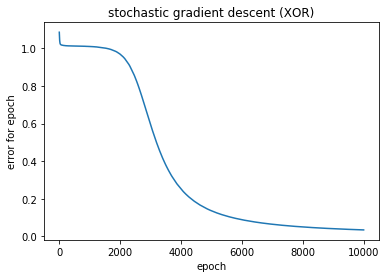

In [24]:
# Same input tensor X and new labels y for xor
Y_xor = torch.tensor([0.,1.,1.,0.])
N = X.shape[0] # number of input patterns

# Initialize parameters
#     Although you will implement gradient descent manually, let's set requires_grad=True
#     anyway so PyTorch will track the gradient too, and we can compare your gradient with PyTorch's.
w_34 = torch.randn(2,requires_grad=True) # [size 2] tensor representing [w_3,w_4]
w_012 = torch.randn(3,requires_grad=True) # [size 3] tensor representing [w_0,w_1,w_2]
b_0 = torch.randn(1,requires_grad=True) # [size 1] tensor
b_1 = torch.randn(1,requires_grad=True) # [size 1] tensor

alpha = 0.05 # learning rate
nepochs = 10000 # number of epochs

track_error = []
verbose = True
for e in range(nepochs): # for each epoch
    error_epoch = 0. # sum loss across the epoch
    perm = np.random.permutation(N)
    for p in perm: # visit data points in random order
        x_pat = X[p,:] # input pattern
        
        # Compute the output of hidden neuron h
        # e.g., two lines like the following
        net_h = x_pat @ w_34 + b_0
        h = g_logistic(net_h)
        # TODO : YOUR CODE GOES HERE
        #raise Exception('Replace with your code.')                  
        
        # Compute the output of neuron yhat
        # e.g., two lines like the following
        net_y = torch.cat((x_pat, h)) @ w_012 + b_1
        yhat = g_logistic(net_y)
        # TODO : YOUR CODE GOES HERE
        #raise Exception('Replace with your code.')                     
        
        # compute loss
        y = Y_xor[p]
        myloss = loss(yhat,y)
        error_epoch += myloss.item()
        
        # print output if this is the last epoch
        if (e == nepochs-1):
            print("Final result:")
            print_forward(x_pat,yhat,y)
            print("")

        # Compute the gradient manually
        if verbose:
            print('Compute the gradient manually')
            print_forward(x_pat,yhat,y)
        with torch.no_grad():
            # TODO : YOUR GRADIENT CODE GOES HERE
            #  should include at least these 4 lines (helper lines may be useful)
            w_34_grad = 2*(yhat - y)*yhat*(1-yhat)*w_012[2]*h*(1-h)*x_pat
            b_0_grad = 2*(yhat - y)*yhat*(1-yhat)*w_012[2]*h*(1-h)
            w_012_grad = 2*(yhat - y)*yhat*(1-yhat)*torch.cat((x_pat, h))
            b_1_grad = 2*(yhat - y)*yhat*(1-yhat)
            #  make sure to inclose your code in the "with torch.no_grad()" wrapper,
            #   otherwise PyTorch will try to track the "gradient" of the gradient computation, which we don't want.
            #raise Exception('Replace with your code.')                      
        if verbose:
            print(" Grad for w_34 and b_0")
            print_grad(w_34_grad.numpy(),b_0_grad.numpy())
            print(" Grad for w_012 and b_1")
            print_grad(w_012_grad.numpy(),b_1_grad.numpy())
            print("")

        # Compute the gradient with PyTorch and compre with manual values
        if verbose: print('Compute the gradient using PyTorch .backward()')
        myloss.backward()
        if verbose:
            print(" Grad for w_34 and b_0")
            print_grad(w_34.grad.numpy(),b_0.grad.numpy())
            print(" Grad for w_012 and b_1")
            print_grad(w_012.grad.numpy(),b_1.grad.numpy())
            print("")
        w_34.grad.zero_() # clear PyTorch's gradient
        b_0.grad.zero_()
        w_012.grad.zero_()
        b_1.grad.zero_()
        
        # Parameter update with gradient descent
        with torch.no_grad():
            # TODO : YOUR PARAMETER UPDATE CODE GOES HERE
            # Four lines of the form
            w_34 -= alpha*w_34_grad
            b_0 -= alpha*b_0_grad
            w_012 -= alpha*w_012_grad
            b_1 -= alpha*b_1_grad
            #raise Exception('Replace with your code.')
            
    if verbose==True: verbose=False
    track_error.append(error_epoch)
    if e % 50 == 0:
        print("epoch " + str(e) + "; error=" +str(round(error_epoch,3)))

# track output of gradient descent
plt.figure()
plt.clf()
plt.plot(track_error)
plt.title('stochastic gradient descent (XOR)')
plt.ylabel('error for epoch')
plt.xlabel('epoch')
plt.show()

<div class="alert alert-success" role="alert">
<h3> Problem 6 (10 points) </h3>
<br>
After running your XOR network, print the values of the learned weights and biases. Your job now is to describe the solution that the network has learned. How does it work? Walk through each input pattern to describe how the network computes the right answer (if it does). See discussion in lecture for an example.
</div>

In [25]:
print(f'w_3: {w_34[0]}\tw_4: {w_34[1]}')
print('b_0:', b_0.item())
print(f'w_0: {w_012[0]}\tw_1: {w_012[1]}\tw_2: {w_012[2]}')
print('b_1:', b_1.item())

w_3: 7.41431188583374	w_4: -6.627054691314697
b_0: 3.405608654022217
w_0: 4.925023078918457	w_1: -4.53387451171875	w_2: -10.097084999084473
b_1: 7.307826042175293


<strong>when {0,0} </strong>
net_h in this case is b_0 > 0.5, thus, h will be activated. net_y is b_1 + w_2 < 0.5, matches y.

<strong>when {1,0} </strong>
net_h is w_3 + b_0 > 0.5, thus, h is activated. net_y is w_0 + w_2 + b_1 > 0.5, matches y.

<strong>when {0,1} </strong>
net_h is w_4 + b_0 < 0.5, thus, h is not activated. net_y is w_1 + b_1 > 0.5, matches y.

<strong>when {1,1} </strong>
net_h is w_3 + w_4 + b_0 > 0.5, thus, h is activated. net_y is w_0 + w_1 + w_2 + b_1 < 0.5, matches y.